# Fig. 4 v02:
* MIOST-K v2.0.1
* All with lon_s

inds from: /Users/Gomez023/src/git/OSR10/parcels_simus/2025-07-10_retention_eddy_MIOSTv201.ipynb

In [1]:
# venv_py_eddy_tracker_05

import matplotlib.pyplot as plt 

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter#
import matplotlib.ticker as mticker
import cartopy.feature as cf

In [2]:
%matplotlib inline
import numpy as np
import math
from datetime import timedelta, datetime

import xarray as xr
from py_eddy_tracker.observations.observation import EddiesObservations
from matplotlib.path import Path
import matplotlib.gridspec   as gridspec


In [3]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes_map(title):
    fig = plt.figure(figsize=(11, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94], projection=ccrs.PlateCarree())

    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")

    # Add coastlines and grid lines
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True);     
    gl.top_labels = False; gl.right_labels = False

    return ax

def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))

# Example 1:

/Users/Gomez023/src/git/OSR10/parcels_simus/2025-04-28_retention_eddy01.ipynb

## Loading data:

In [4]:
output_filename_m = "miostv201_apr_ex01_01.zarr" # 2025-04-10_simu_MIOST_test02.ipynb         #### v2!!! --> /Users/Gomez023/src/git/OSR10/parcels_simus/2025-07-10_simu_MIOSTv201_test02.ipynb
output_filename_d = "duacs-nrt_apr_test02.zarr" 

ds_parcels_m_e01 = xr.open_dataset(output_filename_m)
ds_parcels_d_e01 = xr.open_dataset(output_filename_d)

/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [5]:
a_DUACS_NRT_20240401 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240401.nc")
a_MIOST_20240401 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240401.nc")

a_DUACS_NRT_20240421 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240421.nc")
a_MIOST_20240421 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240421.nc")


## Perc.:

In [6]:
ind_ini_d = 12 
ind_ini_m = 14
ind_end_d = 7 
ind_end_m = 3

### Ini:

* DUACS:

In [7]:
particle_lon_ini_d_e01 = ds_parcels_d_e01['lon'][:,0]  # longitudes of your particles
particle_lat_ini_d_e01 = ds_parcels_d_e01['lat'][:,0]  # latitudes of your particles

eddy_lon_D_240401_e01 = a_DUACS_NRT_20240401.contour_lon_s[ind_ini_d] 
eddy_lat_D_240401_e01 = a_DUACS_NRT_20240401.contour_lat_s[ind_ini_d]

In [8]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240401_e01, eddy_lat_D_240401_e01)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_d_e01, particle_lat_ini_d_e01)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_d_e01 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

1123 particles are inside the eddy.


* MIOST:

In [9]:
particle_lon_ini_m_e01 = ds_parcels_m_e01['lon'][:,0]  # longitudes of your particles
particle_lat_ini_m_e01 = ds_parcels_m_e01['lat'][:,0]  # latitudes of your particles

eddy_lon_M_240401_e01 = a_MIOST_20240401.contour_lon_s[ind_ini_m]
eddy_lat_M_240401_e01 = a_MIOST_20240401.contour_lat_s[ind_ini_m]


In [10]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240401_e01, eddy_lat_M_240401_e01)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_m_e01, particle_lat_ini_m_e01)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_m_e01 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

1078 particles are inside the eddy.


### End:

* DUACS:

In [11]:
particle_lon_end_d_e01 = ds_parcels_d_e01['lon'][:,-1]  # longitudes of your particles
particle_lat_end_d_e01 = ds_parcels_d_e01['lat'][:,-1]  # latitudes of your particles

eddy_lon_D_240421_e01 = a_DUACS_NRT_20240421.contour_lon_s[ind_end_d]
eddy_lat_D_240421_e01 = a_DUACS_NRT_20240421.contour_lat_s[ind_end_d]


In [12]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240421_e01, eddy_lat_D_240421_e01)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_d_e01, particle_lat_end_d_e01)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_d_e01 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

1011 particles are inside the eddy.


In [13]:
result_d_e01 = ((particles_inside_end_d_e01.shape[0] - particles_inside_ini_d_e01.shape[0]) / particles_inside_ini_d_e01.shape[0]) * 100

In [14]:
f"{result_d_e01:.2f}%"
# f"{result_d_e03:+.2f}%"


'-9.97%'

* MIOST:

In [15]:
particle_lon_end_m_e01 = ds_parcels_m_e01['lon'][:,-1]  # longitudes of your particles
particle_lat_end_m_e01 = ds_parcels_m_e01['lat'][:,-1]  # latitudes of your particles

eddy_lon_M_240421_e01 = a_MIOST_20240421.contour_lon_s[ind_end_m]
eddy_lat_M_240421_e01 = a_MIOST_20240421.contour_lat_s[ind_end_m]


In [16]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240421_e01, eddy_lat_M_240421_e01)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_m_e01, particle_lat_end_m_e01)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_m_e01 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

1519 particles are inside the eddy.


In [17]:
result_m_e01 = ((particles_inside_end_m_e01.shape[0] - particles_inside_ini_m_e01.shape[0]) / particles_inside_ini_m_e01.shape[0]) * 100

In [18]:
f"{result_m_e01:.2f}%"

'40.91%'

# Example 2:

/Users/Gomez023/src/git/OSR10/parcels_simus/2025-05-28_retention_eddy02.ipynb

## Loading data:

In [19]:
output_filename_m_e02 = "miostv201_feb_ex02_01.zarr" # /Users/Gomez023/src/git/OSR10/parcels_simus/2025-07-10_simu_MIOSTv201_0224_test05_FIXED.ipynb
output_filename_d_e02 = "duacs-nrt_feb_ex02_01.zarr" 

ds_parcels_m_e02 = xr.open_dataset(output_filename_m_e02)
ds_parcels_d_e02 = xr.open_dataset(output_filename_d_e02) # fix --> e02

/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [20]:
a_MIOST_20240221 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240221.nc")
a_DUACS_NRT_20240221 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240221.nc")

a_MIOST_20240201 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240201.nc")
a_DUACS_NRT_20240201 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240201.nc")


## Perc.:

In [21]:
ind_ini_d = 9
ind_ini_m = 15
ind_end_d = 3 
ind_end_m = 11

### Ini:

* DUACS:

In [22]:
particle_lon_ini_d_e02 = ds_parcels_d_e02['lon'][:,0]  # longitudes of your particles
particle_lat_ini_d_e02 = ds_parcels_d_e02['lat'][:,0]  # latitudes of your particles

eddy_lon_D_240201_e02 = a_DUACS_NRT_20240201.contour_lon_s[ind_ini_d] 
eddy_lat_D_240201_e02 = a_DUACS_NRT_20240201.contour_lat_s[ind_ini_d]

In [23]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240201_e02, eddy_lat_D_240201_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_d_e02, particle_lat_ini_d_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_d_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

502 particles are inside the eddy.


* MIOST:

In [24]:
particle_lon_ini_m_e02 = ds_parcels_m_e02['lon'][:,0]  # longitudes of your particles
particle_lat_ini_m_e02 = ds_parcels_m_e02['lat'][:,0]  # latitudes of your particles

eddy_lon_M_240201_e02 = a_MIOST_20240201.contour_lon_s[ind_ini_m]
eddy_lat_M_240201_e02 = a_MIOST_20240201.contour_lat_s[ind_ini_m]


In [25]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240201_e02, eddy_lat_M_240201_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_m_e02, particle_lat_ini_m_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_m_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

344 particles are inside the eddy.


### End:

* DUACS:

In [26]:
particle_lon_end_d_e02 = ds_parcels_d_e02['lon'][:,-1]  # longitudes of your particles
particle_lat_end_d_e02 = ds_parcels_d_e02['lat'][:,-1]  # latitudes of your particles

eddy_lon_D_240221_e02 = a_DUACS_NRT_20240221.contour_lon_s[ind_end_d]
eddy_lat_D_240221_e02 = a_DUACS_NRT_20240221.contour_lat_s[ind_end_d]


In [27]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240221_e02, eddy_lat_D_240221_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_d_e02, particle_lat_end_d_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_d_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

675 particles are inside the eddy.


In [28]:
result_d_e02 = ((particles_inside_end_d_e02.shape[0] - particles_inside_ini_d_e02.shape[0]) / particles_inside_ini_d_e02.shape[0]) * 100

In [29]:
f"{result_d_e02:.2f}%"
# f"{result_d_e03:+.2f}%"


'34.46%'

* MIOST:

In [30]:
particle_lon_end_m_e02 = ds_parcels_m_e02['lon'][:,-1]  # longitudes of your particles
particle_lat_end_m_e02 = ds_parcels_m_e02['lat'][:,-1]  # latitudes of your particles

eddy_lon_M_240221_e02 = a_MIOST_20240221.contour_lon_s[ind_end_m]
eddy_lat_M_240221_e02 = a_MIOST_20240221.contour_lat_s[ind_end_m]


In [31]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240221_e02, eddy_lat_M_240221_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_m_e02, particle_lat_end_m_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_m_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

472 particles are inside the eddy.


In [32]:
result_m_e02 = ((particles_inside_end_m_e02.shape[0] - particles_inside_ini_m_e02.shape[0]) / particles_inside_ini_m_e02.shape[0]) * 100

In [33]:
f"{result_m_e02:.2f}%"

'37.21%'

### Loading eddy contours of that day:

#### MIOST:

# Ini:

In [34]:
a_MIOST_20240201 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240201.nc")


In [35]:
eddy_lon_D_240201 = a_DUACS_NRT_20240201.contour_lon_s[9]
eddy_lat_D_240201 = a_DUACS_NRT_20240201.contour_lat_s[9]

# --> Duacs ini ii = 9, MIOST ini ii = 13

# Start:

In [36]:
ii = 9
eddy_lon_D_240201 = a_DUACS_NRT_20240201.contour_lon_s[ii]
eddy_lat_D_240201 = a_DUACS_NRT_20240201.contour_lat_s[ii]


In [37]:
ii = 13
eddy_lon_M_240201 = a_MIOST_20240201.contour_lon_s[ii]
eddy_lat_M_240201 = a_MIOST_20240201.contour_lat_s[ii]

In [38]:
particle_lon_ini_m = ds_parcels_m_e02['lon'][:,0]  # longitudes of your particles
particle_lat_ini_m = ds_parcels_m_e02['lat'][:,0]  # latitudes of your particles


In [39]:
particle_lon_ini_d = ds_parcels_d_e02['lon'][:,0]  # longitudes of your particles
particle_lat_ini_d = ds_parcels_d_e02['lat'][:,0]  # latitudes of your particles


In [40]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240201, eddy_lat_M_240201)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_m, particle_lat_ini_m)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

0 particles are inside the eddy.


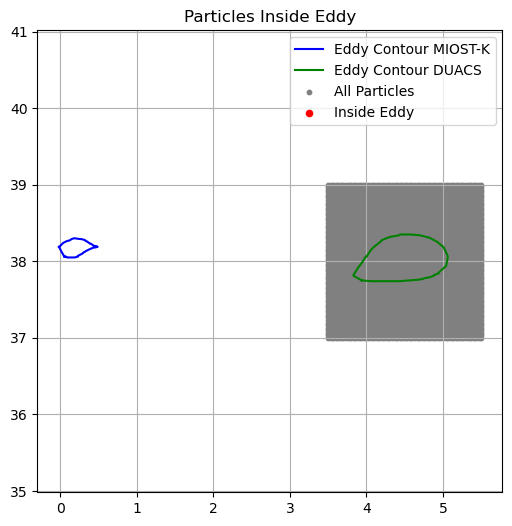

In [41]:
plt.figure(figsize=(6, 6))
plt.plot(eddy_lon_M_240201, eddy_lat_M_240201, label="Eddy Contour MIOST-K", color='blue')
plt.plot(eddy_lon_D_240201, eddy_lat_D_240201, label="Eddy Contour DUACS", color='g')
plt.scatter(particle_lon_ini_m, particle_lat_ini_m, label="All Particles", s=10, color='gray')
plt.scatter(particles_inside_ini[:, 0], particles_inside_ini[:, 1], label="Inside Eddy", s=20, color='red')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title("Particles Inside Eddy")
plt.show()

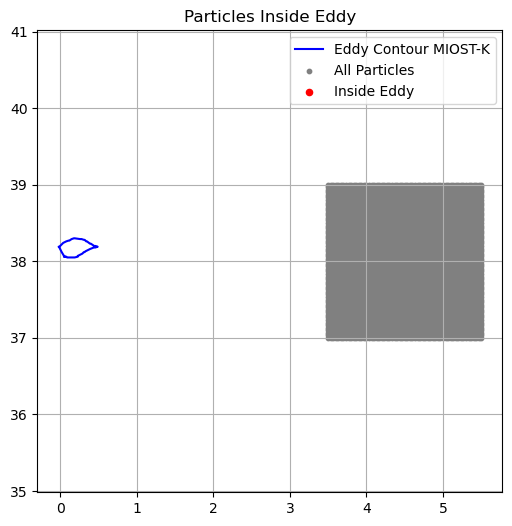

In [42]:
plt.figure(figsize=(6, 6))
plt.plot(eddy_lon_M_240201, eddy_lat_M_240201, label="Eddy Contour MIOST-K", color='blue')
plt.scatter(particle_lon_ini_m, particle_lat_ini_m, label="All Particles", s=10, color='gray')
plt.scatter(particles_inside_ini[:, 0], particles_inside_ini[:, 1], label="Inside Eddy", s=20, color='red')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title("Particles Inside Eddy")
plt.show()

In [43]:
particle_lon_end_m.shape

NameError: name 'particle_lon_end_m' is not defined

In [44]:
particle_lon_ini_m.shape

(3721,)

# --> same number, delete not working? or not relevant?

# add this: np.sum(inside) instead of number, need to give name to inside_m..

In [45]:
print(eddy_lon_M_240221.min())
print(eddy_lat_M_240221.min())
print(eddy_lon_M_240221.max())
print(eddy_lat_M_240221.max())

print(eddy_lon_D_240221.min())
print(eddy_lat_D_240221.min())
print(eddy_lon_D_240221.max())
print(eddy_lat_D_240221.max())

NameError: name 'eddy_lon_M_240221' is not defined

# Do for DUACS:

## Start:

In [46]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240201, eddy_lat_D_240201)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_d, particle_lat_ini_d)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_D = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

502 particles are inside the eddy.


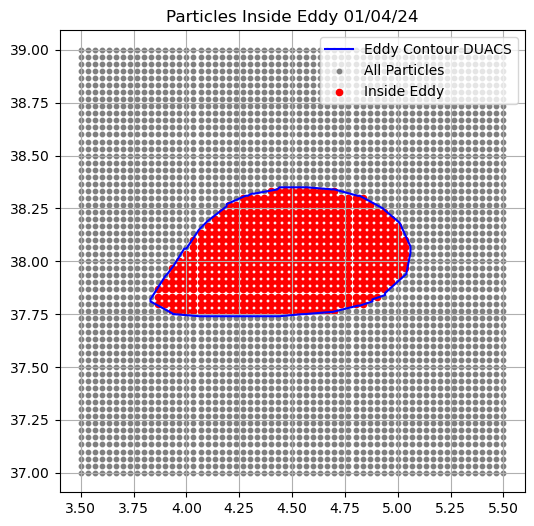

In [47]:
plt.figure(figsize=(6, 6))
# plt.plot(eddy_lon_M_240401, eddy_lat_M_240401, label="Eddy Contour MIOST-K", color='blue')
plt.plot(eddy_lon_D_240201, eddy_lat_D_240201, label="Eddy Contour DUACS", color='b')
plt.scatter(particle_lon_ini_d, particle_lat_ini_d, label="All Particles", s=10, color='gray')
plt.scatter(particles_inside_ini_D[:, 0], particles_inside_ini_D[:, 1], label="Inside Eddy", s=20, color='red')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title("Particles Inside Eddy 01/04/24")
plt.show()

## End:

In [48]:
## clean
particle_lon_end_D = ds_parcels_d_e02['lon'][:,-1]  # longitudes of your particles
particle_lat_end_D = ds_parcels_d_e02['lat'][:,-1]  # latitudes of your particles

In [49]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240221, eddy_lat_D_240221)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_D, particle_lat_end_D)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_D = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

NameError: name 'eddy_lon_D_240221' is not defined

In [50]:
plt.figure(figsize=(6, 6))
# plt.plot(eddy_lon_M_240401, eddy_lat_M_240401, label="Eddy Contour MIOST-K", color='blue')
plt.plot(eddy_lon_D_240221, eddy_lat_D_240221, label="Eddy Contour DUACS", color='b')
plt.scatter(particle_lon_end_D, particle_lat_end_D, label="All Particles", s=10, color='gray')
plt.scatter(particles_inside_end_D[:, 0], particles_inside_end_D[:, 1], label="Inside Eddy", s=20, color='red')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title("Particles Inside Eddy 21/04/24")
plt.show()

NameError: name 'eddy_lon_D_240221' is not defined

<Figure size 600x600 with 0 Axes>

In [51]:
particle_lon_ini_d.shape[0]

3721

## New perc. calc. (final , like ex03):

In [52]:
ind_end_m = 11
ind_end_d = 3
ind_ini_m = 15
ind_ini_d = 9

#### Ini:

* DUACS:

In [53]:
particle_lon_ini_d_e02 = ds_parcels_d_e02['lon'][:,0]  # longitudes of your particles
particle_lat_ini_d_e02 = ds_parcels_d_e02['lat'][:,0]  # latitudes of your particles

eddy_lon_D_240201_e02 = a_DUACS_NRT_20240201.contour_lon_s[ind_ini_d] 
eddy_lat_D_240201_e02 = a_DUACS_NRT_20240201.contour_lat_s[ind_ini_d]


In [54]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240201_e02, eddy_lat_D_240201_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_d_e02, particle_lat_ini_d_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_d_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

502 particles are inside the eddy.


* MIOST:

In [55]:
particle_lon_ini_m_e02 = ds_parcels_m_e02['lon'][:,0]  # longitudes of your particles
particle_lat_ini_m_e02 = ds_parcels_m_e02['lat'][:,0]  # latitudes of your particles

eddy_lon_M_240201_e02 = a_MIOST_20240201.contour_lon_s[ind_ini_m] 
eddy_lat_M_240201_e02 = a_MIOST_20240201.contour_lat_s[ind_ini_m]


In [56]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240201_e02, eddy_lat_M_240201_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_m_e02, particle_lat_ini_m_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_m_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

344 particles are inside the eddy.


### End:

* DUACS:

In [57]:
particle_lon_end_d_e02 = ds_parcels_d_e02['lon'][:,-1]  # longitudes of your particles
particle_lat_end_d_e02 = ds_parcels_d_e02['lat'][:,-1]  # latitudes of your particles

eddy_lon_D_240221_e02 = a_DUACS_NRT_20240221.contour_lon_s[ind_end_d] 
eddy_lat_D_240221_e02 = a_DUACS_NRT_20240221.contour_lat_s[ind_end_d]


In [58]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240221_e02, eddy_lat_D_240221_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_d_e02, particle_lat_end_d_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_d_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

675 particles are inside the eddy.


In [59]:
result_d_e02 = ((particles_inside_end_d_e02.shape[0] - particles_inside_ini_d_e02.shape[0]) / particles_inside_ini_d_e02.shape[0]) * 100

In [60]:
# f"{result_d_e02:.2f}%"
f"{result_d_e02:+.2f}%"


'+34.46%'

* MIOST:

In [61]:
particle_lon_end_m_e02 = ds_parcels_m_e02['lon'][:,-1]  # longitudes of your particles
particle_lat_end_m_e02 = ds_parcels_m_e02['lat'][:,-1]  # latitudes of your particles

eddy_lon_M_240221_e02 = a_MIOST_20240221.contour_lon_s[ind_end_m] 
eddy_lat_M_240221_e02 = a_MIOST_20240221.contour_lat_s[ind_end_m]


In [62]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240221_e02, eddy_lat_M_240221_e02)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_m_e02, particle_lat_end_m_e02)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_m_e02 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

472 particles are inside the eddy.


In [63]:
result_m_e02 = ((particles_inside_end_m_e02.shape[0] - particles_inside_ini_m_e02.shape[0]) / particles_inside_ini_m_e02.shape[0]) * 100

In [64]:
f"{result_m_e02:.2f}%"
# f"{result_d_e02:+.2f}%"


'37.21%'

# Example 3:

/Users/Gomez023/src/git/OSR10/parcels_simus/2025-07-04_retention_eddy03.ipynb

## Loading data:

In [65]:
output_filename_m = "miostv201_feb_ex03_01.zarr" #/Users/Gomez023/src/git/OSR10/parcels_simus/2025-07-10_simu_MIOSTv201_0224_FIXED.ipynb
output_filename_d = "duacs-nrt_feb_ex03.zarr" 

ds_parcels_m_e03 = xr.open_dataset(output_filename_m)
ds_parcels_d_e03 = xr.open_dataset(output_filename_d)

/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/anaconda3/envs/venv_py-eddy-tracker_05/lib/python3.10/site-packages/xarray/backends/plugins.py:159: Runtime

In [66]:
a_DUACS_NRT_20240201 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240201.nc")
a_MIOST_20240201 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240201.nc")

a_DUACS_NRT_20240221 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_DUACS-NRT_20240221.nc")
a_MIOST_20240221 = EddiesObservations.load_file("/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/a_MIOST_v2.0.1_20240221.nc")

# should be 21 or 20?



### Ini:

In [67]:
ind_end_m = 16
ind_end_d = 10
ind_ini_m = 0
ind_ini_d = 12

* DUACS:

In [68]:
ind_ini_d = 12 #(from) retention_03 notebook)

particle_lon_ini_d_e03 = ds_parcels_d_e03['lon'][:,0]  # longitudes of your particles
particle_lat_ini_d_e03 = ds_parcels_d_e03['lat'][:,0]  # latitudes of your particles

eddy_lon_D_240201_e03 = a_DUACS_NRT_20240201.contour_lon_s[ind_ini_d]
eddy_lat_D_240201_e03 = a_DUACS_NRT_20240201.contour_lat_s[ind_ini_d]


In [69]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240201_e03, eddy_lat_D_240201_e03)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_d_e03, particle_lat_ini_d_e03)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_d_e03 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

821 particles are inside the eddy.


* MIOST:

In [70]:
particle_lon_ini_m_e03 = ds_parcels_m_e03['lon'][:,0]  # longitudes of your particles
particle_lat_ini_m_e03 = ds_parcels_m_e03['lat'][:,0]  # latitudes of your particles

eddy_lon_M_240201_e03 = a_MIOST_20240201.contour_lon_s[ind_ini_m]
eddy_lat_M_240201_e03 = a_MIOST_20240201.contour_lat_s[ind_ini_m]


In [71]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240201_e03, eddy_lat_M_240201_e03)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_ini_m_e03, particle_lat_ini_m_e03)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_ini_m_e03 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

1140 particles are inside the eddy.


### End:

* DUACS:

In [72]:
particle_lon_end_d_e03 = ds_parcels_d_e03['lon'][:,-1]  # longitudes of your particles
particle_lat_end_d_e03 = ds_parcels_d_e03['lat'][:,-1]  # latitudes of your particles

eddy_lon_D_240221_e03 = a_DUACS_NRT_20240221.contour_lon_s[ind_end_d]
eddy_lat_D_240221_e03 = a_DUACS_NRT_20240221.contour_lat_s[ind_end_d]


In [73]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_D_240221_e03, eddy_lat_D_240221_e03)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_d_e03, particle_lat_end_d_e03)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_d_e03 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

850 particles are inside the eddy.


In [74]:
result_d_e03 = ((particles_inside_end_d_e03.shape[0] - particles_inside_ini_d_e03.shape[0]) / particles_inside_ini_d_e03.shape[0]) * 100

In [75]:
# f"{result_d_e03:.2f}%"
f"{result_d_e03:+.2f}%"


'+3.53%'

* MIOST:

In [76]:
particle_lon_end_m_e03 = ds_parcels_m_e03['lon'][:,-1]  # longitudes of your particles
particle_lat_end_m_e03 = ds_parcels_m_e03['lat'][:,-1]  # latitudes of your particles

eddy_lon_M_240221_e03 = a_MIOST_20240221.contour_lon_s[ind_end_m] 
eddy_lat_M_240221_e03 = a_MIOST_20240221.contour_lat_s[ind_end_m]


In [77]:
# Build the contour polygon path
contour_points = np.vstack((eddy_lon_M_240221_e03, eddy_lat_M_240221_e03)).T
eddy_path = Path(contour_points)

# Stack particles as (lon, lat) points
particles = np.vstack((particle_lon_end_m_e03, particle_lat_end_m_e03)).T

# Test each particle
inside = eddy_path.contains_points(particles)  # Boolean array

# Example: print or extract those inside
particles_inside_end_m_e03 = particles[inside]

print(f"{np.sum(inside)} particles are inside the eddy.")

674 particles are inside the eddy.


In [78]:
result_m_e03 = ((particles_inside_end_m_e03.shape[0] - particles_inside_ini_m_e03.shape[0]) / particles_inside_ini_m_e03.shape[0]) * 100

In [79]:
f"{result_m_e03:.2f}%"

'-40.88%'

# Joint subplot:

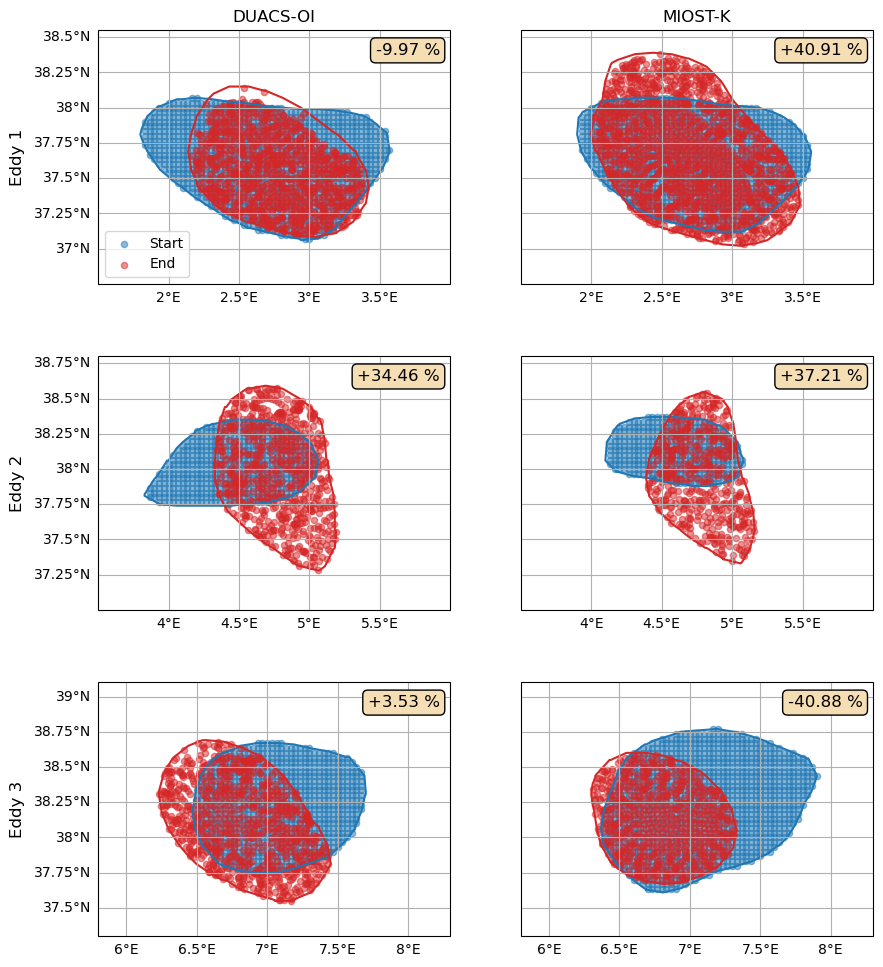

In [89]:
xtext = 0.97
ytext = 0.95

plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(3, 2) #, width_ratios=[.98, .02])
# axC = plt.subplot(gs[:,-1])

###################################################################### Eddy1
ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
# ax.set_ylabel("Eddy 1") # --> does not work with gridlines
ax.text(-0.25, 0.5, "Eddy 1", transform=ax.transAxes,
        fontsize=12, rotation='vertical', verticalalignment='center')

ax.set_title("DUACS-OI")
plt.plot(eddy_lon_D_240401_e01, eddy_lat_D_240401_e01, color='C0', transform=ccrs.PlateCarree()) #, label="Eddy contour ini."
plt.scatter(particles_inside_ini_d_e01[:, 0], particles_inside_ini_d_e01[:, 1], label="Start", s=20, color='C0', alpha=0.5, transform=ccrs.PlateCarree())

plt.plot(eddy_lon_D_240421_e01, eddy_lat_D_240421_e01, color='C3', transform=ccrs.PlateCarree()) #, label="Eddy contour end"
plt.scatter(particles_inside_end_d_e01[:, 0], particles_inside_end_d_e01[:, 1], label="End", s=20, color='C3', alpha=0.5, transform=ccrs.PlateCarree())
# plt.axis('equal')
plt.legend(loc=3)
# plt.grid(True)
plt.xlim([1.5, 1.5+2.5])
plt.ylim([36.75, 36.75+1.8])

# Add textbox in top-right corner
ax.text(
    xtext, ytext,           # x, y in axis coordinates (0 to 1)
    f"{result_d_e01:.2f} %",              # text
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(
        facecolor='wheat',  # cream-like color
        edgecolor='black',
        boxstyle='round,pad=0.3'
    )
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax = plt.subplot(gs[0,1], projection=ccrs.PlateCarree())
ax.set_title("MIOST-K")
plt.plot(eddy_lon_M_240401_e01, eddy_lat_M_240401_e01, label="Eddy contour ini.", color='C0', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_ini_m_e01[:, 0], particles_inside_ini_m_e01[:, 1], label="Ini.", s=20, color='C0', alpha=0.5, transform=ccrs.PlateCarree())

plt.plot(eddy_lon_M_240421_e01, eddy_lat_M_240421_e01, label="Eddy contour end", color='C3', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_end_m_e01[:, 0], particles_inside_end_m_e01[:, 1], label="End", s=20, color='C3', alpha=0.5, transform=ccrs.PlateCarree())
plt.xlim([1.5, 1.5+2.5])
plt.ylim([36.75, 36.75+1.8])

# Add textbox in top-right corner
ax.text(
    xtext, ytext,           # x, y in axis coordinates (0 to 1)
    f"+{result_m_e01:.2f} %",              # text
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(
        facecolor='wheat',  # cream-like color
        edgecolor='black',
        boxstyle='round,pad=0.3'
    )
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False

###################################################################### Eddy 2
ax = plt.subplot(gs[1,0], projection=ccrs.PlateCarree())
ax.text(-0.25, 0.5, "Eddy 2", transform=ax.transAxes,
        fontsize=12, rotation='vertical', verticalalignment='center')
plt.plot(eddy_lon_D_240201_e02, eddy_lat_D_240201_e02, label="Eddy contour ini.", color='C0', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_ini_d_e02[:, 0], particles_inside_ini_d_e02[:, 1], label="Ini.", s=20, color='C0', alpha=0.5, transform=ccrs.PlateCarree())

plt.plot(eddy_lon_D_240221_e02, eddy_lat_D_240221_e02, label="Eddy contour end", color='C3', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_end_d_e02[:, 0], particles_inside_end_d_e02[:, 1], label="End", s=20, color='C3', alpha=0.5, transform=ccrs.PlateCarree())
plt.xlim([3.5, 3.5+2.5])
plt.ylim([37., 37.+1.8])

# Add textbox in top-right corner
ax.text(
    xtext, ytext,           # x, y in axis coordinates (0 to 1)
    f"+{result_d_e02:.2f} %",              # text
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(
        facecolor='wheat',  # cream-like color
        edgecolor='black',
        boxstyle='round,pad=0.3'
    )
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax = plt.subplot(gs[1,1], projection=ccrs.PlateCarree())
plt.plot(eddy_lon_M_240201_e02, eddy_lat_M_240201_e02, label="Eddy contour ini.", color='C0', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_ini_m_e02[:, 0], particles_inside_ini_m_e02[:, 1], label="Ini.", s=20, color='C0', alpha=0.5, transform=ccrs.PlateCarree())

plt.plot(eddy_lon_M_240221_e02, eddy_lat_M_240221_e02, label="Eddy contour end", color='C3', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_end_m_e02[:, 0], particles_inside_end_m_e02[:, 1], label="End", s=20, color='C3', alpha=0.5, transform=ccrs.PlateCarree())
plt.xlim([3.5, 3.5+2.5])
plt.ylim([37., 37.+1.8])

# Add textbox in top-right corner
ax.text(
    xtext, ytext,           # x, y in axis coordinates (0 to 1)
    f"+{result_m_e02:.2f} %",              # text
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(
        facecolor='wheat',  # cream-like color
        edgecolor='black',
        boxstyle='round,pad=0.3'
    )
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False

###################################################################### Eddy 3
ax = plt.subplot(gs[2,0], projection=ccrs.PlateCarree())
ax.text(-0.25, 0.5, "Eddy 3", transform=ax.transAxes,
        fontsize=12, rotation='vertical', verticalalignment='center')
plt.plot(eddy_lon_D_240201_e03, eddy_lat_D_240201_e03, label="Eddy contour ini.", color='C0', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_ini_d_e03[:, 0], particles_inside_ini_d_e03[:, 1], label="Ini.", s=20, color='C0', alpha=0.5, transform=ccrs.PlateCarree())

plt.plot(eddy_lon_D_240221_e03, eddy_lat_D_240221_e03, label="Eddy contour end", color='C3', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_end_d_e03[:, 0], particles_inside_end_d_e03[:, 1], label="End", s=20, color='C3', alpha=0.5, transform=ccrs.PlateCarree())
plt.xlim([5.8, 5.8+2.5])
plt.ylim([37.3, 37.3+1.8])

# Add textbox in top-right corner
ax.text(
    xtext, ytext,           # x, y in axis coordinates (0 to 1)
    f"+{result_d_e03:.2f} %",              # text
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(
        facecolor='wheat',  # cream-like color
        edgecolor='black',
        boxstyle='round,pad=0.3'
    )
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False 

ax = plt.subplot(gs[2,1], projection=ccrs.PlateCarree())
plt.plot(eddy_lon_M_240201_e03, eddy_lat_M_240201_e03, label="Eddy contour ini.", color='C0', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_ini_m_e03[:, 0], particles_inside_ini_m_e03[:, 1], label="Ini.", s=20, color='C0', alpha=0.5, transform=ccrs.PlateCarree())

plt.plot(eddy_lon_M_240221_e03, eddy_lat_M_240221_e03, label="Eddy contour end", color='C3', transform=ccrs.PlateCarree())
plt.scatter(particles_inside_end_m_e03[:, 0], particles_inside_end_m_e03[:, 1], label="End", s=20, color='C3', alpha=0.5, transform=ccrs.PlateCarree())
plt.xlim([5.8, 5.8+2.5])
plt.ylim([37.3, 37.3+1.8])

# Add textbox in top-right corner
ax.text(
    xtext, ytext,           # x, y in axis coordinates (0 to 1)
    f"{result_m_e03:.2f} %",              # text
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(
        facecolor='wheat',  # cream-like color
        edgecolor='black',
        boxstyle='round,pad=0.3'
    )
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False

